# 01. Grid Search and Random Search | البحث الشبكي والبحث العشوائي

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1-4: All examples** - Data processing, regression, classification, clustering
- ✅ **Unit 2, Example 2: Cross-Validation** - Understanding CV for model evaluation
- ✅ **Understanding of hyperparameters**: Parameters that control model behavior (not learned from data)

**If you haven't completed these**, you might struggle with:
- Understanding why hyperparameter tuning is needed
- Knowing when to use Grid Search vs Random Search
- Understanding how cross-validation is used in hyperparameter tuning

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 5, Example 1** - it's about finding the best hyperparameters automatically!

**Why this example FIRST in Unit 5?**
- **Before** you can use advanced techniques, you need to tune hyperparameters properly
- **Before** you can compare models, you need each model at its best (tuned hyperparameters)
- **Before** you can use boosting, you need to understand hyperparameter tuning

**Builds on**: 
- 📓 Unit 2, Example 2: Cross-Validation (we know how to evaluate models)
- 📓 All previous examples (we've seen hyperparameters like C, gamma, max_depth, etc.)

**Leads to**: 
- 📓 Example 2: Boosting (uses hyperparameter tuning)
- 📓 All ML projects (hyperparameter tuning is essential for best performance!)

**Why this order?**
1. Grid Search teaches **systematic hyperparameter tuning** (tries all combinations)
2. Random Search shows **efficient alternative** (tries random combinations, often faster)
3. Both methods use **cross-validation** (reliable evaluation during tuning)

---

## The Story: Finding the Best Settings | القصة: إيجاد أفضل الإعدادات

Imagine you're tuning a radio. **Before** Grid Search, you try settings randomly (might miss the best one). **After** Grid Search, you try all combinations systematically - guaranteed to find the best settings!

Same with machine learning: **Before** Grid Search, we guess hyperparameters (might not be optimal). **After** Grid Search, we try all combinations and pick the best - much better performance!

---

## Why Grid Search and Random Search Matter | لماذا يهم البحث الشبكي والعشوائي؟

Hyperparameter tuning is essential for model performance:
- **Grid Search**: Tries all combinations systematically (thorough but slow)
- **Random Search**: Tries random combinations (faster, often finds good solutions)
- **Cross-Validation**: Uses CV during tuning for reliable evaluation
- **Automatic**: Finds best hyperparameters without manual guessing
- **Industry Standard**: Used in all professional ML projects

## Learning Objectives | أهداف التعلم
1. Perform Grid Search for hyperparameter tuning
2. Perform Random Search for hyperparameter tuning
3. Compare Grid Search vs Random Search
4. Use cross-validation in hyperparameter tuning
5. Visualize hyperparameter search results
6. Know when to use each method

In [1]:
# Step 1: Import necessary libraries
# These libraries help us perform hyperparameter tuning

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
import time  # For measuring computation time
from sklearn.model_selection import (
    GridSearchCV,        # Grid Search (tries all combinations)
    RandomizedSearchCV,  # Random Search (tries random combinations)
    train_test_split     # For splitting data
)
from sklearn.ensemble import RandomForestClassifier  # Model to tune
from sklearn.svm import SVC  # Another model to tune
from sklearn.datasets import make_classification  # For generating sample data
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.metrics import accuracy_score, classification_report  # For evaluation

print("✅ Libraries imported successfully!")
print("\n📚 Key Hyperparameter Tuning Concepts:")
print("   - GridSearchCV: Tries ALL combinations of hyperparameters")
print("   - RandomizedSearchCV: Tries RANDOM combinations (faster)")
print("   - Cross-Validation: Uses CV during tuning for reliable evaluation")
print("   - Best Parameters: Hyperparameters that give best CV score")
print("   - Best Estimator: Model trained with best hyperparameters")
print("\n   💡 Grid Search: Thorough but slow (tries all combinations)")
print("   💡 Random Search: Faster but might miss best (tries random subset)")


✅ Libraries imported successfully!

📚 Key Hyperparameter Tuning Concepts:
   - GridSearchCV: Tries ALL combinations of hyperparameters
   - RandomizedSearchCV: Tries RANDOM combinations (faster)
   - Cross-Validation: Uses CV during tuning for reliable evaluation
   - Best Parameters: Hyperparameters that give best CV score
   - Best Estimator: Model trained with best hyperparameters

   💡 Grid Search: Thorough but slow (tries all combinations)
   💡 Random Search: Faster but might miss best (tries random subset)


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been using default hyperparameters or guessing values manually.

**AFTER**: We'll use Grid Search and Random Search to automatically find the best hyperparameters!

**Why this matters**: Hyperparameters dramatically affect model performance. Automatic tuning finds optimal values much better than manual guessing!


In [2]:
# Generate sample classification data
# We'll use this to demonstrate hyperparameter tuning

print("\n1. Generating sample classification data...")
print("إنشاء بيانات تصنيف نموذجية...")

np.random.seed(42)  # For reproducibility
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,  # Only 5 features are informative
    n_redundant=2,    # 2 features are redundant
    random_state=42
)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

print(f"\n📊 Data Shape: {df.shape}")
print(f"📊 Target distribution:")
print(df['target'].value_counts())
print("\n🔍 Notice:")
print("   - 1000 samples with 10 features")
print("   - We'll tune hyperparameters to get best performance on this data")



1. Generating sample classification data...
إنشاء بيانات تصنيف نموذجية...

📊 Data Shape: (1000, 11)
📊 Target distribution:
target
1    503
0    497
Name: count, dtype: int64

🔍 Notice:
   - 1000 samples with 10 features
   - We'll tune hyperparameters to get best performance on this data


## Step 1: Generate Sample Data | الخطوة 1: إنشاء بيانات نموذجية

**BEFORE**: We need to learn hyperparameter tuning, but we need sample data to practice on.

**AFTER**: We'll create classification data to demonstrate Grid Search and Random Search!

**Why this data?** We need data to tune hyperparameters on. Real hyperparameter tuning uses your actual dataset!

In [3]:
np.random.seed(42)
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    random_state=42
)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y
print(f"\nData Shape: {df.shape}")
print(f"Target distribution:")
print(df['target'].value_counts())



Data Shape: (1000, 11)
Target distribution:
target
1    503
0    497
Name: count, dtype: int64


In [4]:
# Split data
X_data = df.drop('target', axis=1)
y_data = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)


In [5]:
print("\n" + "=" * 60)
print("1. Grid Search for Random Forest")
print("البحث الشبكي للغابة العشوائية")
print("=" * 60)

# Define parameter grid
# Grid Search will try ALL combinations of these values
# Example: n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1
#          n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=2
#          ... and so on for ALL combinations
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [3, 5, 7, None],        # Maximum tree depth
    'min_samples_split': [2, 5, 10],     # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]        # Minimum samples in leaf
}

total_combinations = np.prod([len(v) for v in param_grid_rf.values()])
print(f"\n📊 Parameter Grid:")
print(f"   Total combinations: {total_combinations}")
print(f"   Grid Search will try ALL {total_combinations} combinations!")
print(f"   This is thorough but can be slow for large grids")



1. Grid Search for Random Forest
البحث الشبكي للغابة العشوائية

📊 Parameter Grid:
   Total combinations: 108
   Grid Search will try ALL 108 combinations!
   This is thorough but can be slow for large grids


In [6]:
# Scale features (for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 1. Grid Search for Random Forest


In [7]:
print("\n" + "=" * 60)
print("1. Grid Search for Random Forest")
print("البحث الشبكي للغابة العشوائية")
print("=" * 60)



1. Grid Search for Random Forest
البحث الشبكي للغابة العشوائية


In [8]:
# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print(f"\nParameter Grid:")
print(f"  Total combinations: {np.prod([len(v) for v in param_grid_rf.values()])}")
print(f"  المجموعات الإجمالية: {np.prod([len(v) for v in param_grid_rf.values()])}")



Parameter Grid:
  Total combinations: 108
  المجموعات الإجمالية: 108


In [9]:
print("\n" + "=" * 60)
print("2. Random Search for Random Forest")
print("البحث العشوائي للغابة العشوائية")
print("=" * 60)

# Same parameter grid as Grid Search
# But Random Search will try only RANDOM combinations
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

n_iter = 20  # Try only 20 random combinations (vs 108 for Grid Search!)
print(f"\n📊 Random Search Configuration:")
print(f"   Total possible combinations: {np.prod([len(v) for v in param_distributions_rf.values()])}")
print(f"   Random Search will try: {n_iter} random combinations")
print(f"   Much faster than Grid Search!")
print(f"   Often finds good solutions with fewer tries")



2. Random Search for Random Forest
البحث العشوائي للغابة العشوائية

📊 Random Search Configuration:
   Total possible combinations: 180
   Random Search will try: 20 random combinations
   Much faster than Grid Search!
   Often finds good solutions with fewer tries


In [10]:
# Perform Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    rf, param_grid_rf, cv=5, scoring='accuracy',
    n_jobs=-1, verbose=1
)
print("\nStarting Grid Search...")
print("بدء البحث الشبكي...")
grid_search_rf.fit(X_train, y_train)
print(f"\nBest Parameters:")
print(f"أفضل المعاملات:")
for param, value in grid_search_rf.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV Score: {grid_search_rf.best_score_:.4f}")
print(f"أفضل درجة CV: {grid_search_rf.best_score_:.4f}")



Starting Grid Search...
بدء البحث الشبكي...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters:
أفضل المعاملات:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 10
  n_estimators: 50

Best CV Score: 0.9387
أفضل درجة CV: 0.9387


In [11]:
# Test on test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {test_acc_rf:.4f}")
print(f"دقة الاختبار: {test_acc_rf:.4f}")


Test Accuracy: 0.9400
دقة الاختبار: 0.9400


## 2. Random Search for Random Forest


In [12]:
print("\n" + "=" * 60)
print("2. Random Search for Random Forest")
print("البحث العشوائي للغابة العشوائية")
print("=" * 60)



2. Random Search for Random Forest
البحث العشوائي للغابة العشوائية


In [13]:
# Same parameter grid
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Perform Random Search (try fewer combinations)

In [14]:
n_iter = 20  # Try only 20 random combinations
print(f"\nRandom Search will try {n_iter} random combinations")
print(f"سيجرب البحث العشوائي {n_iter} تركيبة عشوائية")
random_search_rf = RandomizedSearchCV(
    rf, param_distributions_rf, n_iter=n_iter, cv=5,
    scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)
print("\nStarting Random Search...")
print("بدء البحث العشوائي...")
random_search_rf.fit(X_train, y_train)
print(f"\nBest Parameters:")
print(f"أفضل المعاملات:")
for param, value in random_search_rf.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV Score: {random_search_rf.best_score_:.4f}")
print(f"أفضل درجة CV: {random_search_rf.best_score_:.4f}")



Random Search will try 20 random combinations
سيجرب البحث العشوائي 20 تركيبة عشوائية

Starting Random Search...
بدء البحث العشوائي...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters:
أفضل المعاملات:
  n_estimators: 100
  min_samples_split: 2
  min_samples_leaf: 1
  max_depth: None

Best CV Score: 0.9288
أفضل درجة CV: 0.9288


In [15]:
# Test on test set
y_pred_rf_rs = random_search_rf.best_estimator_.predict(X_test)
test_acc_rf_rs = accuracy_score(y_test, y_pred_rf_rs)
print(f"Test Accuracy: {test_acc_rf_rs:.4f}")
print(f"دقة الاختبار: {test_acc_rf_rs:.4f}")


Test Accuracy: 0.9500
دقة الاختبار: 0.9500


In [16]:
# 3. Grid Search for SVM
print("\n" + "=" * 60)
print("3. Grid Search for SVM")
print("البحث الشبكي لـ SVM")
print("=" * 60)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
print(f"\nParameter Grid:")
print(f"  Total combinations: {np.prod([len(v) for v in param_grid_svm.values()])}")
svm = SVC(random_state=42, probability=True)
grid_search_svm = GridSearchCV(
    svm, param_grid_svm, cv=5, scoring='accuracy',
    n_jobs=-1, verbose=1
)
print("\nStarting Grid Search for SVM...")
grid_search_svm.fit(X_train_scaled, y_train)
print(f"\nBest Parameters:")
for param, value in grid_search_svm.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV Score: {grid_search_svm.best_score_:.4f}")
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test_scaled)
test_acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy: {test_acc_svm:.4f}")



3. Grid Search for SVM
البحث الشبكي لـ SVM

Parameter Grid:
  Total combinations: 72

Starting Grid Search for SVM...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters:
  C: 10
  gamma: scale
  kernel: rbf

Best CV Score: 0.9175
Test Accuracy: 0.9300


In [17]:
# 4. Comparison Table
print("\n" + "=" * 60)
print("4. Comparison of Methods")
print("مقارنة الطرق")
print("=" * 60)
comparison = pd.DataFrame({
    'Method': ['Grid Search (RF)', 'Random Search (RF)', 'Grid Search (SVM)'],
    'Best CV Score': [
        grid_search_rf.best_score_,
        random_search_rf.best_score_,
        grid_search_svm.best_score_
    ],
    'Test Accuracy': [
        test_acc_rf,
        test_acc_rf_rs,
        test_acc_svm
    ],
    'Total Combinations Tried': [
        grid_search_rf.cv_results_['params'].__len__(),
        n_iter,
        grid_search_svm.cv_results_['params'].__len__()
    ]
})
print("\nComparison Table:")
print(comparison.to_string(index=False))



4. Comparison of Methods
مقارنة الطرق

Comparison Table:
            Method  Best CV Score  Test Accuracy  Total Combinations Tried
  Grid Search (RF)        0.93875           0.94                       108
Random Search (RF)        0.92875           0.95                        20
 Grid Search (SVM)        0.91750           0.93                        72


## 5. Visualize Grid Search Results (SVM)


In [18]:
print("\n" + "=" * 60)
print("5. Visualize Grid Search Results")
print("تصور نتائج البحث الشبكي")
print("=" * 60)



5. Visualize Grid Search Results
تصور نتائج البحث الشبكي


In [19]:
# Extract results for visualization
results_df = pd.DataFrame(grid_search_svm.cv_results_)



✓ Plot saved as 'grid_search_heatmap.png'


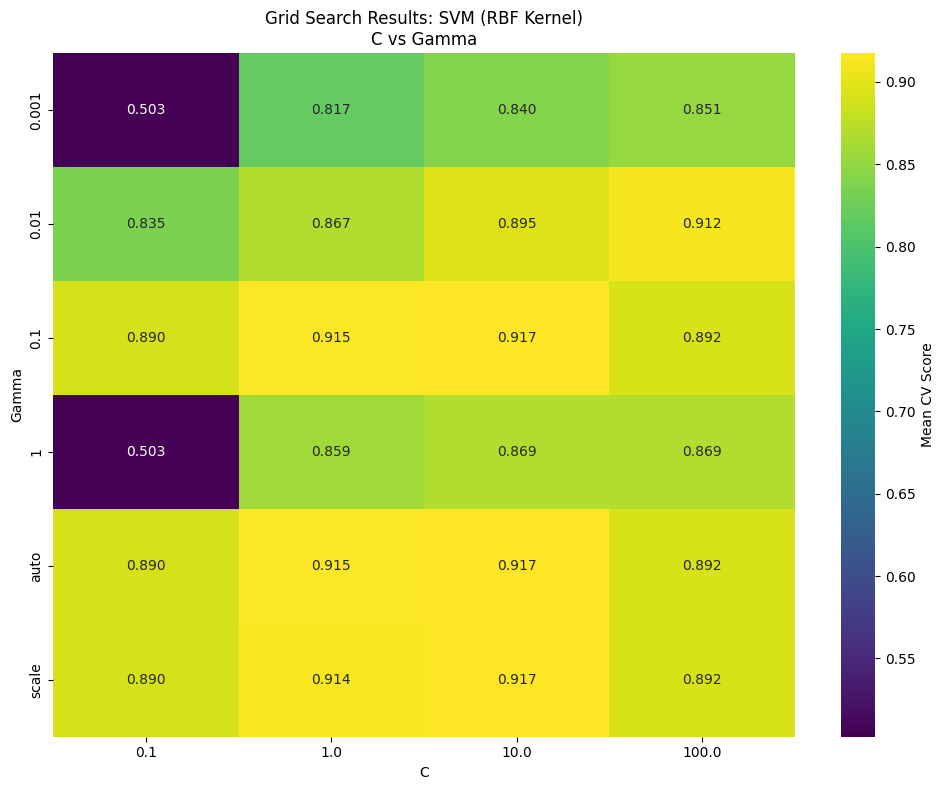

In [20]:
# Filter for RBF kernel
rbf_results = results_df[results_df['param_kernel'] == 'rbf']
if len(rbf_results) > 0:
    # Create heatmap of C vs gamma
    pivot_table = rbf_results.pivot_table(
        values='mean_test_score',
        index='param_gamma',
        columns='param_C'
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis', cbar_kws={'label': 'Mean CV Score'})
    plt.title('Grid Search Results: SVM (RBF Kernel)\nC vs Gamma')
    plt.xlabel('C')
    plt.ylabel('Gamma')
    plt.tight_layout()
    plt.savefig('grid_search_heatmap.png', dpi=300, bbox_inches='tight')
    print("\n✓ Plot saved as 'grid_search_heatmap.png'")
    plt.show()


In [21]:
# 6. Compare Computation Time
print("\n" + "=" * 60)
print("6. Computation Time Comparison")
print("مقارنة وقت الحساب")
print("=" * 60)



6. Computation Time Comparison
مقارنة وقت الحساب


Grid Search timing (use smaller grid for demo)

In [22]:
small_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}
rf_small = RandomForestClassifier(random_state=42)
grid_small = GridSearchCV(rf_small, small_param_grid, cv=3, n_jobs=-1)
start_time = time.time()
grid_small.fit(X_train[:500], y_train[:500])  # Use subset for speed
grid_time = time.time() - start_time


In [23]:
# Random Search timing
random_small = RandomizedSearchCV(rf_small, small_param_grid, n_iter=4, cv=3, n_jobs=-1, random_state=42)
start_time = time.time()
random_small.fit(X_train[:500], y_train[:500])
random_time = time.time() - start_time
print(f"\nGrid Search Time: {grid_time:.2f} seconds")
print(f"Random Search Time: {random_time:.2f} seconds")
print(f"Speedup: {grid_time/random_time:.2f}x")
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)



Grid Search Time: 0.22 seconds
Random Search Time: 0.15 seconds
Speedup: 1.51x

Example 1 Complete! ✓
اكتمل المثال 1! ✓
